## 0a

In [3]:
from pathlib import Path
import os
import fuzzywuzzy
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import shutil

In [4]:
# Grundinställning av sökvägar
local_path = Path().absolute().parent
train_path = local_path / "Lab2"/ "experiment_small_data" / "train"
val_path = local_path / "Lab2"/ "experiment_small_data" / "val"
test_path = local_path / "Lab2"/ "experiment_small_data" / "test"  # Om du har testdata

# Anpassa sökvägar för körning i Kaggle-miljö
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    kaggle_input_path = Path('/kaggle/input')
    train_path = kaggle_input_path / "train-data"
    val_path = kaggle_input_path / "val-data"
    test_path = kaggle_input_path / "test-data"  # Antagande om testdata-sökväg

# Skriv ut sökvägar för att bekräfta
print(f"Train path: {local_path}")
print(f"Train path: {train_path}")
print(f"Validation path: {val_path}")
print(f"Test path: {test_path}")

Train path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs
Train path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train
Validation path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\val
Test path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\test


## 0b

Number of files found: 1600


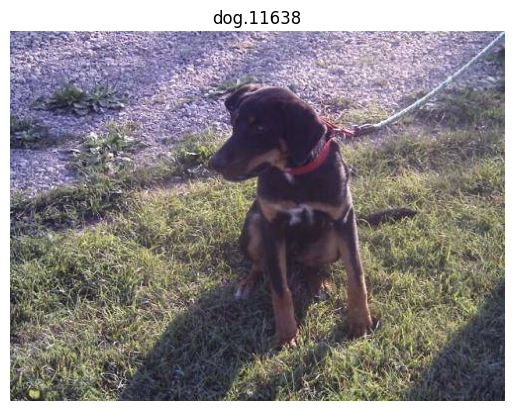

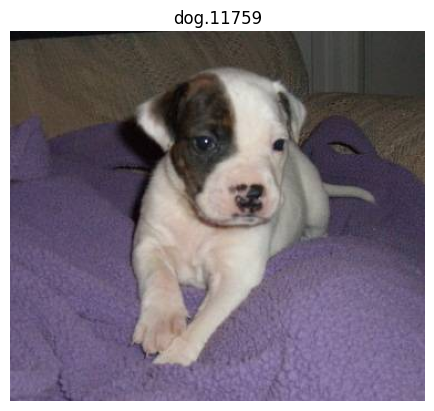

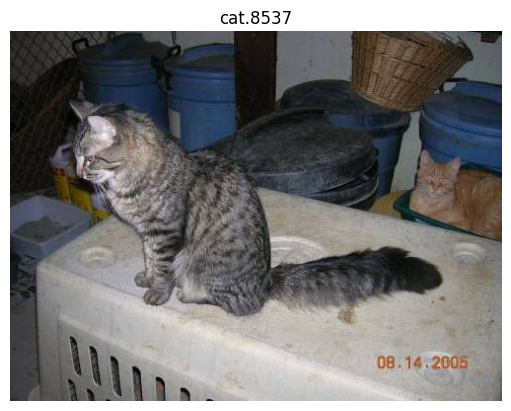

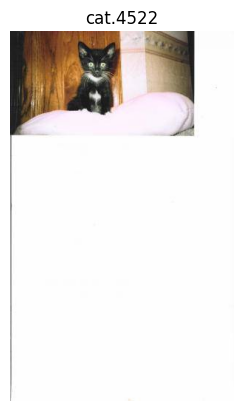

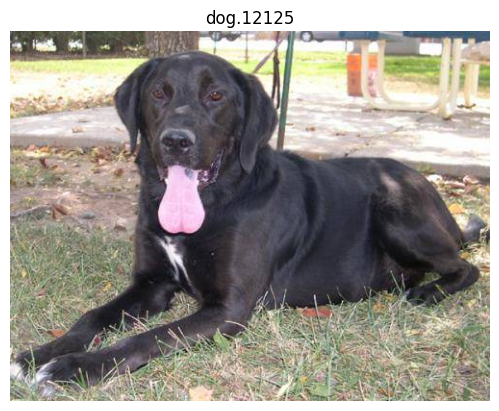

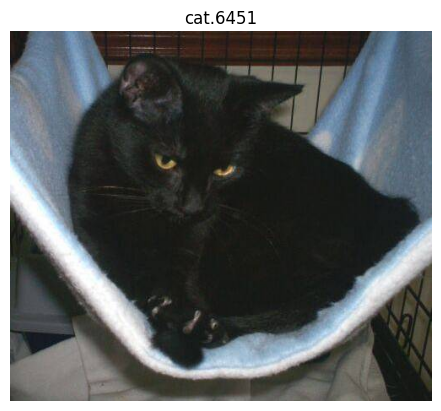

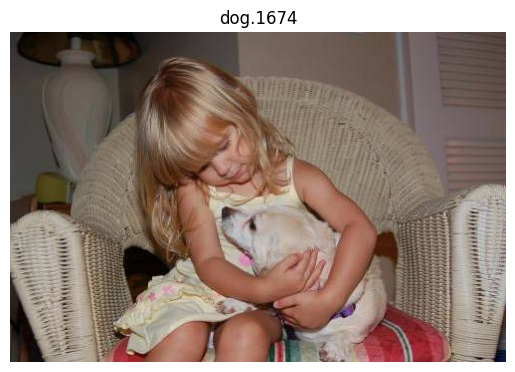

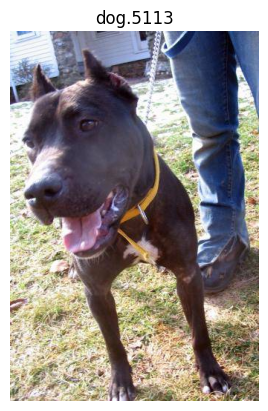

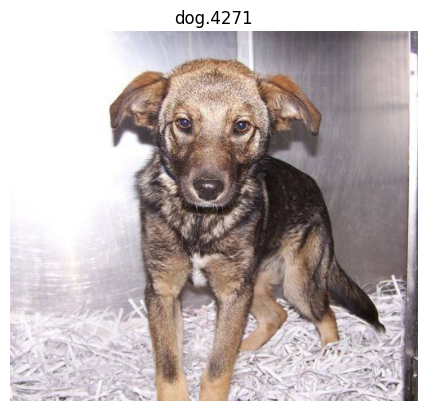

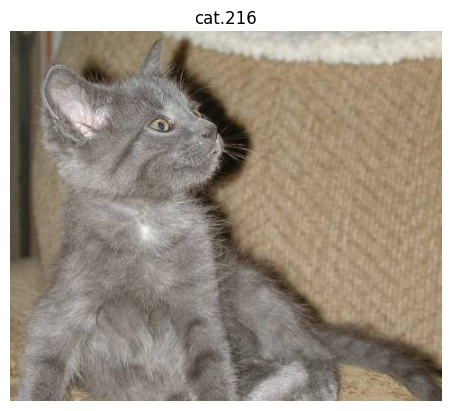

In [5]:

# Listar alla filer i mappen
train_files = list(train_path.glob('*'))
print(f"Number of files found: {len(train_files)}")

# Väljer slumpmässigt 10 filer från listan
random_img = random.sample(train_files, 10)

# Loopar genom de slumpmässigt valda bilderna
for image_file in random_img:
    # Läser in bilden
    image = plt.imread(image_file)
    
    # Tar fram filnamnet (label)
    label = image_file.stem
    
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()


## 0c

In [6]:

folders = [
    ('experiment_small_data', ['test', 'train', 'val']),
           ('experiment_tiny_data', ['test', 'train', 'val']),
           ('original_data', ['test', 'train'])]

for folder, subfolders in folders:
    for subfolder in subfolders:
        Path(folder, subfolder).mkdir(parents=True, exist_ok=True)

## 0d

In [7]:

# Skapar train, val och test mappar om de inte redan finns
small_test = local_path / "Lab2"/ "experiment_small_data" / 'test'
small_train = local_path / "Lab2"/ "experiment_small_data" / 'train'
small_val = local_path / "Lab2"/ "experiment_small_data" / 'val'
original_data = local_path / "Lab2"/ "original_data" / "train"
data_path = local_path / "Lab2"/ "experiment_small_data"

# Antal exempel för varje delmängd
train_size = 1600
val_size = 400
test_size = 500

# Antal exempel för varje klass
dogs_train_size = 800
cats_train_size = 800
dogs_val_size = 200
cats_val_size = 200
dogs_test_size = 250
cats_test_size = 250
'''
# Listar alla bilder för hundar och katter i originaldatasetet
cat_images = list(original_data.glob('cat*.jpg'))
dog_images = list(original_data.glob('dog*.jpg'))

print(len(dog_images))
print(len(cat_images))

# Kontrollfunktion för att se om mapparna redan är fyllda
def check_files(folder, size):
    return len(list(folder.glob('*.jpg'))) >= size

# Funktion för att dela upp och kopiera filer
def distribute_files(source, train_num, val_num, test_num, train_folder, val_folder, test_folder):
    if not (check_files(train_folder, train_num) and check_files(val_folder, val_num) and check_files(test_folder, test_num)):
        images = list(source.glob('*.jpg'))
        random.shuffle(images)
        train = images[:train_num]
        val = images[train_num:train_num + val_num]
        test = images[train_num + val_num:train_num + val_num + test_num]

        for img in train:
            shutil.copy(img, train_folder)
        for img in val:
            shutil.copy(img, val_folder)
        for img in test:
            shutil.copy(img, test_folder)
        print("Files have been allocated and copied.")
    else:
        print("Files are already distributed.")

# Distribuera hund- och kattbilder
distribute_files(original_data / 'dog', dogs_train_size, dogs_val_size, dogs_test_size, small_train, small_val, small_test)
distribute_files(original_data / 'cat', cats_train_size, cats_val_size, cats_test_size, small_train, small_val, small_test)

print("Train|val|test-split har genomförts och datan har sparats i sina respektive mappar.")
'''

'\n# Listar alla bilder för hundar och katter i originaldatasetet\ncat_images = list(original_data.glob(\'cat*.jpg\'))\ndog_images = list(original_data.glob(\'dog*.jpg\'))\n\nprint(len(dog_images))\nprint(len(cat_images))\n\n# Kontrollfunktion för att se om mapparna redan är fyllda\ndef check_files(folder, size):\n    return len(list(folder.glob(\'*.jpg\'))) >= size\n\n# Funktion för att dela upp och kopiera filer\ndef distribute_files(source, train_num, val_num, test_num, train_folder, val_folder, test_folder):\n    if not (check_files(train_folder, train_num) and check_files(val_folder, val_num) and check_files(test_folder, test_num)):\n        images = list(source.glob(\'*.jpg\'))\n        random.shuffle(images)\n        train = images[:train_num]\n        val = images[train_num:train_num + val_num]\n        test = images[train_num + val_num:train_num + val_num + test_num]\n\n        for img in train:\n            shutil.copy(img, train_folder)\n        for img in val:\n            

In [8]:
# Loopar igenom alla filer i mappen och skriver ut deras attribut
for file in train_path.iterdir():
    #print(f"File Name: {file.name}")
    #print(f"File Type: {'File' if file.is_file() else 'Directory'}")
    #print(f"File Size: {file.stat().st_size} bytes")
    #print(f"File Creation Time: {file.stat().st_ctime}")
    #print(f"File Modification Time: {file.stat().st_mtime}")
    # Extraherar labelsvektorn från filnamnet (om den finns)
    labels_vector = file.name.split('_')[-1].split('.')[0]
    #print(f"File Label Vector: {labels_vector}")

## 0e

                                          image_path
0  c:\Users\Sandra\Documents\Github\AI-Sandra-And...
1  c:\Users\Sandra\Documents\Github\AI-Sandra-And...
2  c:\Users\Sandra\Documents\Github\AI-Sandra-And...
3  c:\Users\Sandra\Documents\Github\AI-Sandra-And...
4  c:\Users\Sandra\Documents\Github\AI-Sandra-And...


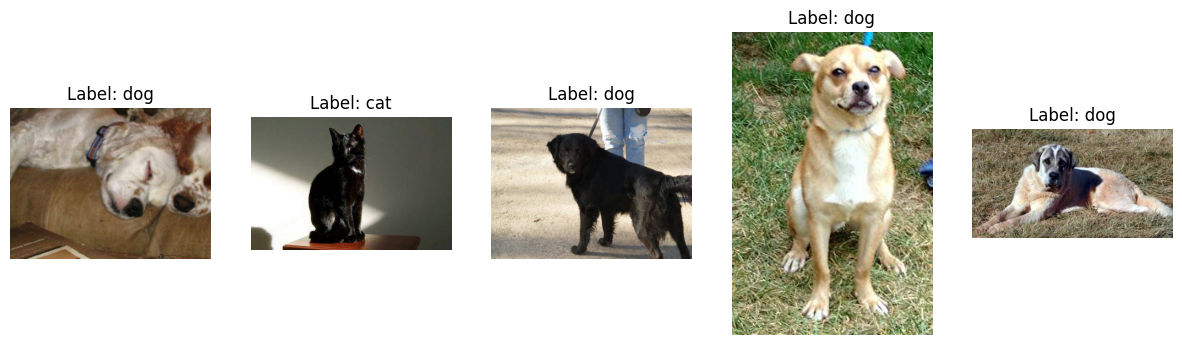

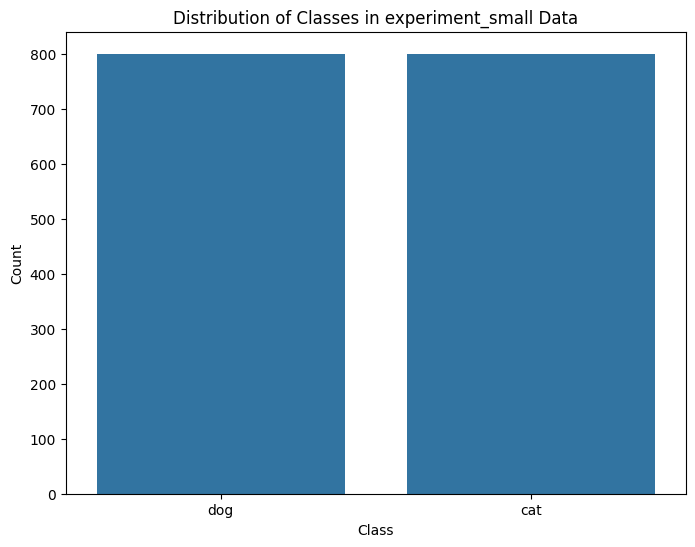

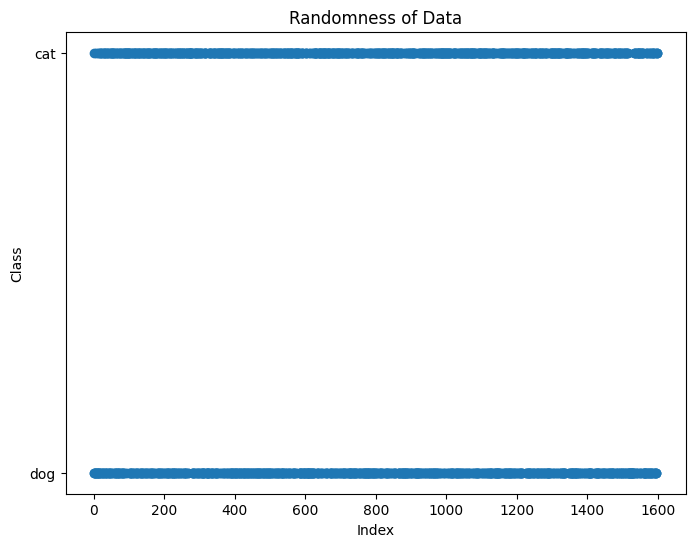

In [27]:
# Listar filer i mappen med filtillägget .jpg
image_files = list(train_path.glob('*.jpg'))

# Skapar en DataFrame med filvägarna som en kolumn
small_train_data = pd.DataFrame({'image_path': [str(file) for file in image_files]})

# Visar de första raderna i datasetet för att kontrollera att det har lästs in korrekt
print(small_train_data.head())

# 1. Plockar ut labelsvektorer och one-hot encodear dem med 0 och 1
# Lägger till en kolumn 'label' för att simulera datasetets struktur
small_train_data['label'] = ['cat' if 'cat' in file else 'dog' for file in small_train_data['image_path']]
one_hot_encoded_labels = pd.get_dummies(small_train_data['label'])

# Lägger till de one-hot encodade labelsvektorerna till DataFramen
small_train_data = pd.concat([small_train_data, one_hot_encoded_labels], axis=1)

# Slumpmässigt samplar rader från DataFrame för att få en mer slumpmässig ordning
small_train_data = small_train_data.sample(frac=1).reset_index(drop=True)

# 2. Plotta några bilder med deras respektive one-hot encoded labels för att kontrollera att det är korrekt
# Plottar de första 5 bilderna med deras labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, (index, row) in enumerate(small_train_data.head().iterrows()):
    img = plt.imread(row['image_path'])
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {row['label']}")
    axes[i].axis('off')
plt.show()

# 3. Skapa lämpliga diagram för att kontrollera att dataseten är balanserad
# Plottar antalet förekomster av varje klass i datasetet
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=small_train_data)
plt.title('Distribution of Classes in experiment_small Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 4. Skapa lämpliga diagram för att kontrollera att datasetet är slumpat
# Kontrollerar fördelningen av klasser över indexet för att se om det finns något mönster
plt.figure(figsize=(8, 6))
plt.plot(small_train_data.index, small_train_data['label'], marker='o', linestyle='')
plt.title('Randomness of Data')
plt.xlabel('Index')
plt.ylabel('Class')
plt.show()


# 1a

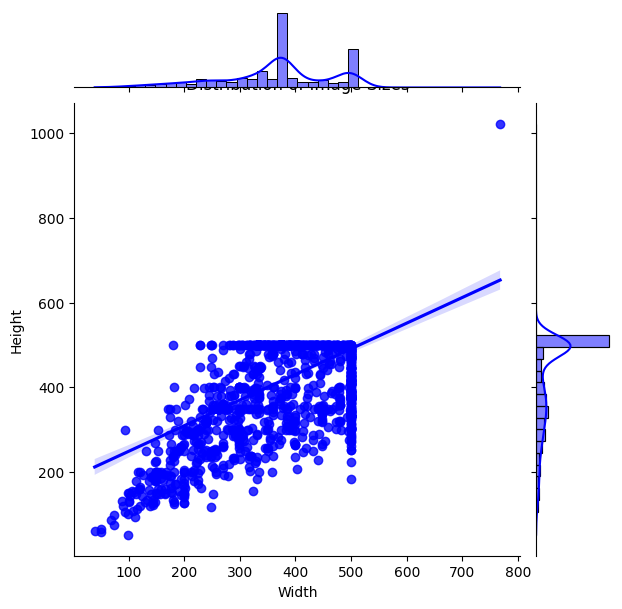

In [28]:
# Skapar en lista med tupler av bildbredd och bildhöjd
image_sizes = [(plt.imread(file).shape[0], plt.imread(file).shape[1]) for file in small_train_data['image_path']]

# Extraherar bildbredd och bildhöjd till separata listor
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

# Skapar en jointplot för att visualisera bildstorlekarna
sns.jointplot(x=widths, y=heights, kind='reg', color='blue')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Sizes', pad=10)
plt.show()

# 1b och 1c

In [9]:
def prepare_images(data_path, min_size=(70, 30), max_size=(650, 600)):
    image_files = list(data_path.glob('*.jpg'))
    print(f"Found {len(image_files)} images in {data_path}")
    images = []
    labels = []

    for file in image_files:
        img = cv2.imread(str(file))
        if img is None:
            print(f"Failed to load image {file}")
            continue
        
        # Kontrollera bildstorleken
        if img.shape[0] < min_size[0] or img.shape[1] < min_size[1] or img.shape[0] > max_size[0] or img.shape[1] > max_size[1]:
            print(f"Skipping image {file} due to inappropriate size: {img.shape}")
            continue

        img = cv2.resize(img, (250, 200))  # Storleksändra bilden till önskat format
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konvertera färg från BGR till RGB
        images.append(img)
        label = 1 if 'dog' in file.stem else 0
        labels.append(label)
    
    images = np.array(images, dtype=np.float32) / 255.0
    labels = np.array(labels)
    return images, labels

X_train, y_train = prepare_images(small_train)
X_val, y_val = prepare_images(small_val)
X_test, y_test = prepare_images(small_test)

print(X_train)
print(y_train)
print(X_val)
print(y_val)
print(X_test)
print(y_test)

Found 1600 images in c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\cat.4821.jpg due to inappropriate size: (39, 60, 3)
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\cat.835.jpg due to inappropriate size: (768, 1023, 3)
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\cat.8504.jpg due to inappropriate size: (50, 66, 3)
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\dog.8450.jpg due to inappropriate size: (68, 86, 3)
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\dog.8570.jpg due to inappropriate size: (50, 59, 3)
Found 400 images in c:\Users\Sandra\Documents\Github\AI-Sand

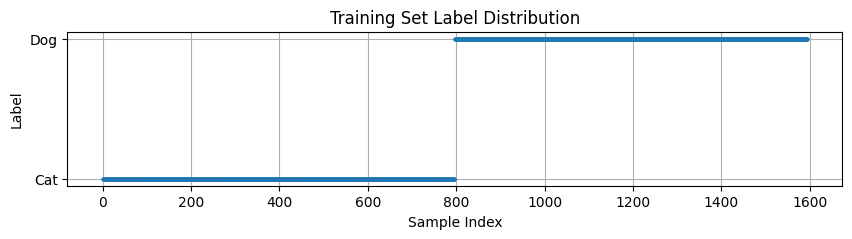

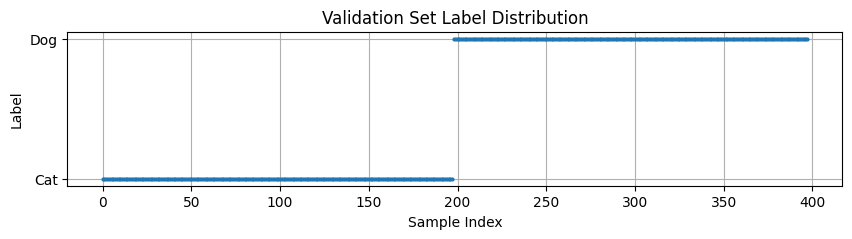

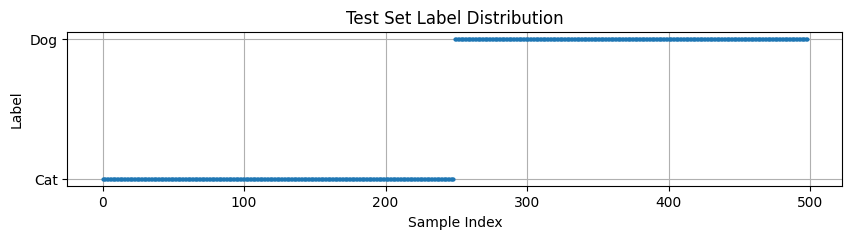

In [10]:
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title="Label Distribution"):
    plt.figure(figsize=(10, 2))
    plt.plot(labels, marker='o', linestyle='', markersize=2)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Label')
    plt.yticks([0, 1], ['Cat', 'Dog'])
    plt.grid(True)
    plt.show()

# Anropa funktionen för att visa label-distribution för varje dataset
plot_label_distribution(y_train, title="Training Set Label Distribution")
plot_label_distribution(y_val, title="Validation Set Label Distribution")
plot_label_distribution(y_test, title="Test Set Label Distribution")


In [11]:
import numpy as np

def shuffle_data(X, y):
    # Skapa en array med index från 0 till antalet dataexempel
    indices = np.arange(X.shape[0])
    # Blanda indexen
    np.random.shuffle(indices)
    # Applicera den blandade ordningen på både bilder och etiketter
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    return X_shuffled, y_shuffled

# Blanda valideringsdata
X_train, y_train = shuffle_data(X_train, y_train)

# Blanda valideringsdata
X_val, y_val = shuffle_data(X_val, y_val)

# Blanda testdata
X_test, y_test = shuffle_data(X_test, y_test)



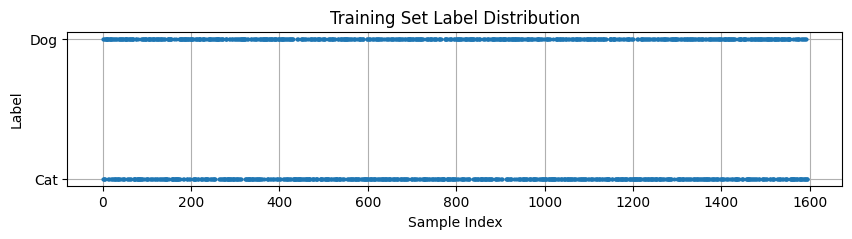

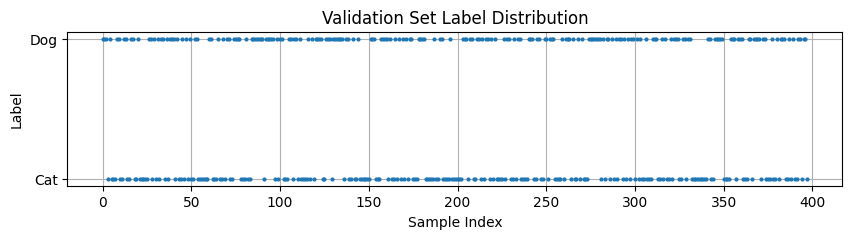

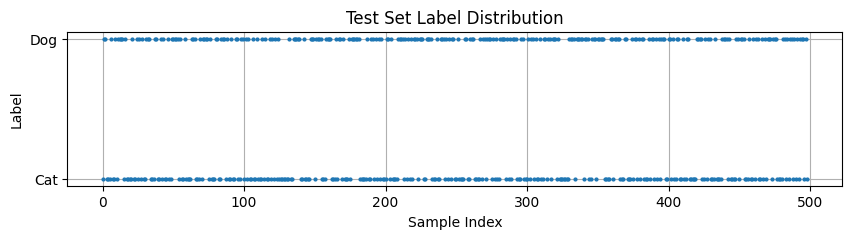

In [12]:
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title="Label Distribution"):
    plt.figure(figsize=(10, 2))
    plt.plot(labels, marker='o', linestyle='', markersize=2)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Label')
    plt.yticks([0, 1], ['Cat', 'Dog'])
    plt.grid(True)
    plt.show()

# Anropa funktionen för att visa label-distribution för varje dataset
plot_label_distribution(y_train, title="Training Set Label Distribution")
plot_label_distribution(y_val, title="Validation Set Label Distribution")
plot_label_distribution(y_test, title="Test Set Label Distribution")


In [13]:
X_train.shape

(1595, 200, 250, 3)

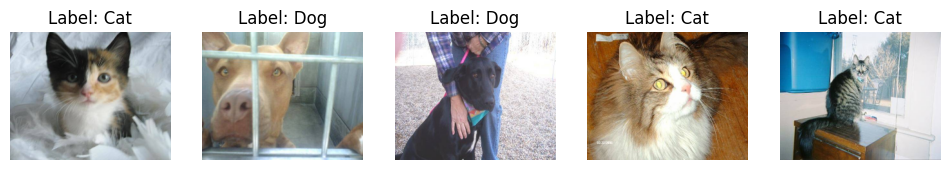

In [14]:
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(12, 2.4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title('Label: Dog' if labels[i] == 1 else 'Label: Cat')
        plt.axis('off')
    plt.show()

# Använder funktionen för att visa exempel från träningsdata
plot_sample_images(X_train, y_train)


In [15]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=2)


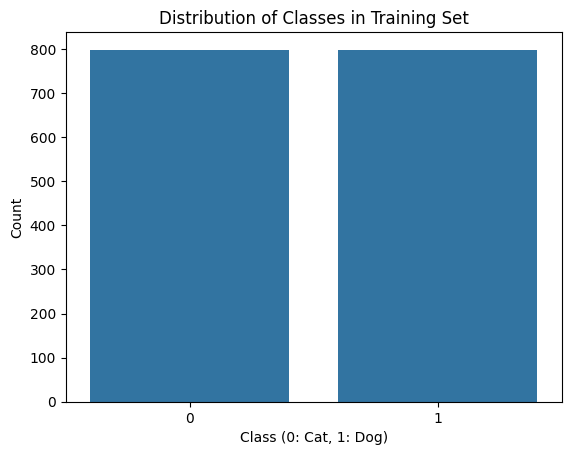

In [16]:
sns.countplot(x=np.argmax(y_train_onehot, axis=1))
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class (0: Cat, 1: Dog)')
plt.ylabel('Count')
plt.show()


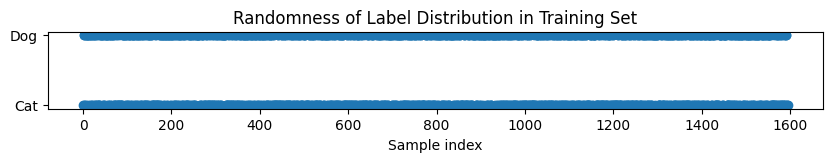

In [17]:
plt.figure(figsize=(10, 1))
plt.plot(np.argmax(y_train_onehot, axis=1), marker='o', linestyle='')
plt.title('Randomness of Label Distribution in Training Set')
plt.xlabel('Sample index')
plt.yticks([0, 1], ['Cat', 'Dog'])
plt.show()


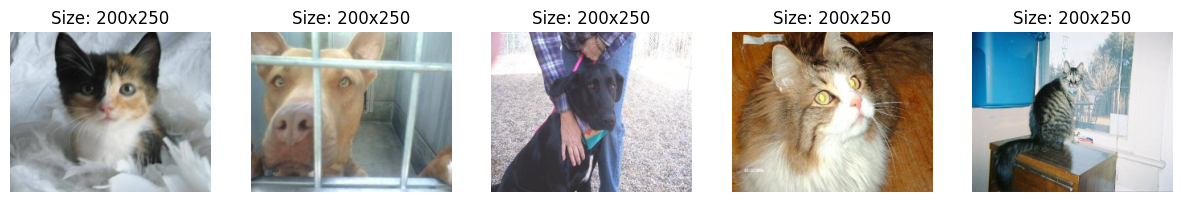

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, img in enumerate(X_train[:5]):
    axes[i].imshow(img)
    axes[i].set_title(f"Size: {img.shape[0]}x{img.shape[1]}")
    axes[i].axis('off')
plt.show()


## 1d

In [ ]:
# Skapar en instans av ImageDataGenerator för data-augmentation
train_datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.25,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Skapar en generator från de skaldade bilderna
image_data_generator = train_datagen.flow(
    X_train,  # Säkerställer att bilderna är korrekt skaldade
    y_train,
    batch_size=5
)

# Visar några av de normaliserade bilderna innan augmentering
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(X_train[i])
    ax[i].axis('off')
plt.show()

def display_augmented_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, ax in zip(range(num_images), axes):
        idx = np.random.randint(0, len(images))
        ax.imshow(images[idx])
        ax.set_title(f'{labels[idx]}')
        ax.axis('off')
    plt.show()
display_augmented_images(X_train, y_train)


plt.imshow(X_train[0])
plt.colorbar()
plt.show()


## 2a

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD

# första test utan augmentering

In [ ]:
# Bygger en sequential model
def build_model():
    model = Sequential([
        Input(shape=(250, 200, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model_plot = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Jämför modellen mot testdata
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_training_history(model_plot)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 928ms/step - accuracy: 0.9509 - loss: 0.1199 - val_accuracy: 0.6734 - val_loss: 1.3542
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 918ms/step - accuracy: 0.9801 - loss: 0.0733 - val_accuracy: 0.6709 - val_loss: 1.4172
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 923ms/step - accuracy: 0.9653 - loss: 0.1161 - val_accuracy: 0.7060 - val_loss: 1.0861
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 906ms/step - accuracy: 0.9937 - loss: 0.0387 - val_accuracy: 0.6508 - val_loss: 1.5184
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 914ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.6709 - val_loss: 1.5463
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 917ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.6884 - val_loss: 1.4132
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 912ms/step - accuracy: 0.9863 - loss: 0.0392 - val_accuracy: 0.6859 - val_loss: 1.6943
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 904ms/step - accuracy: 0.9889 - loss: 0.0371 - val_accu

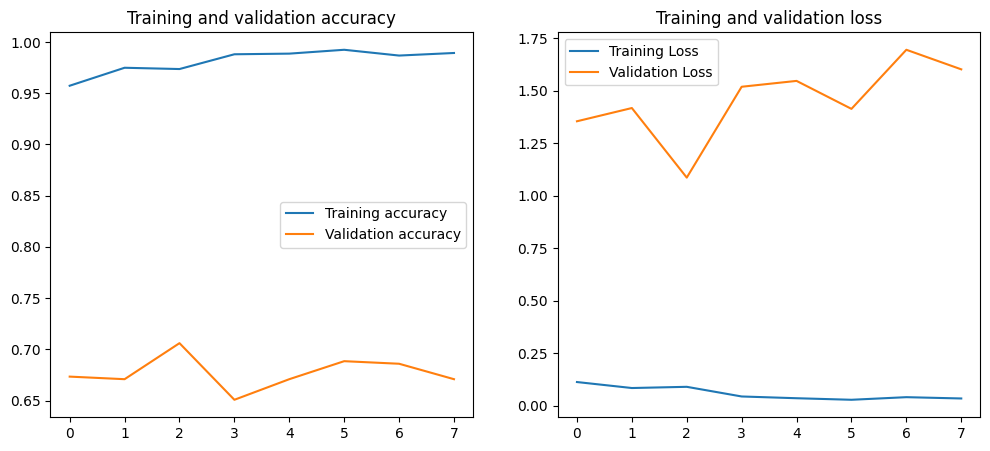

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.7196 - loss: 1.0527
Test Accuracy: 0.7094188332557678


In [ ]:

# Definierar EarlyStopping callback
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Tränar modellen med EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
)

# Plottar träningshistoriken
plot_training_history(history)

# Jämför modellen mot testdatan efter träningen har stoppats tidigt
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
X_train

In [30]:
y_train

array([0, 1, 1, ..., 0, 0, 0])

## Med augmentering

In [25]:

# Definierar modellen med en L2-regularisering
model_aug = Sequential([
    Input(shape=(250, 200, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.7),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])

# Kompilerar modellen
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_aug.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5406 - loss: 1.7342 - val_accuracy: 0.5025 - val_loss: 0.7171
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.6042 - loss: 0.7317 - val_accuracy: 0.4975 - val_loss: 0.8482
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6352 - loss: 0.6812 - val_accuracy: 0.5276 - val_loss: 0.7096
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6125 - loss: 0.6940 - val_accuracy: 0.5075 - val_loss: 0.7206
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6233 - loss: 0.6587 - val_accuracy: 0.5176 - val_loss: 0.6921
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6256 - loss: 0.6545 - val_accuracy: 0.5427 - val_loss: 0.7352
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6423 - loss: 0.6542 - val_accuracy: 0.5126 - val_loss: 0.8071
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6566 - loss: 0.6204 - val_accuracy: 0.5452 - v

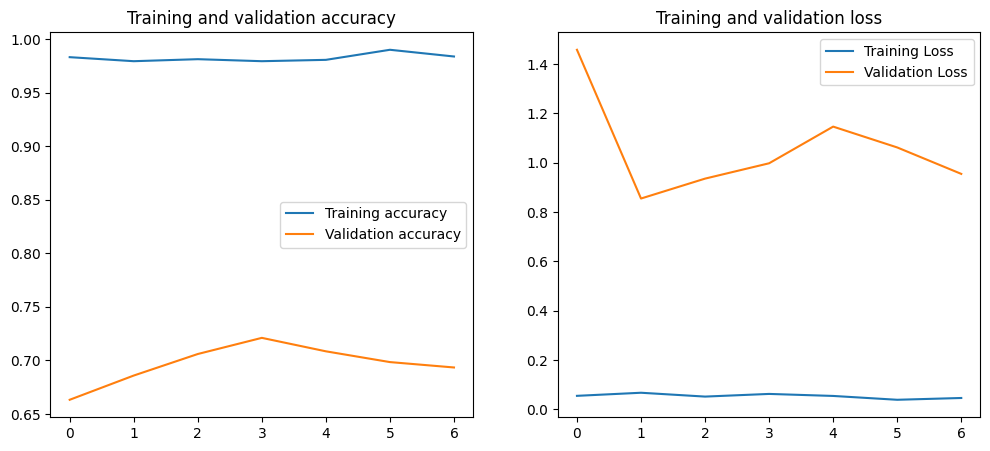

In [ ]:
# Skapar datageneratorn för träningsdatan
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Definierar EarlyStopping callback
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=4,
    verbose=1,
    restore_best_weights=True
)

# Tränar modellen med EarlyStopping och data augmentation
model_aug.fit(
    train_generator,
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
)

# Testar modellen
test_loss, test_accuracy = model_aug.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
plot_training_history(history)


## Visualisera och analysera

# 2b)

    Lägg till Batch Normalization: Detta hjälper till att normalisera inputen till varje lager så att nätverket tränar snabbare och mer stabilt. Detta är särskilt användbart för djupa nätverk.

    Justera Antalet Filter och Lagers Storlek: Öka antalet filter i de konvolutionella lagren för att fånga fler detaljer från bilderna. Ändra också storleken på de dolda lagren för att testa om det kan förbättra modellens kapacitet att lära sig komplexa funktioner.

    Lägg till en Extra Konvolutionell Block: Detta kan hjälpa till att fånga ännu mer komplexa mönster i bilderna, men ökar risken för överanpassning så det bör kombineras med dropout.

    Ändra Optimizer: Testa att använda en annan optimizer som RMSprop istället för Adam för att se om det påverkar hur snabbt eller stabilt nätverket konvergerar.

# Andra test med andra parametrar utan augmentering

In [ ]:

def build_model():
    model = Sequential([
        Input(shape=(250, 200, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.7),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model = build_model()
model_plot = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Jämför modellen mot testdatan
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_training_history(model_plot)

In [ ]:
# Definiera EarlyStopping callback
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Träna modellen med EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
)

# Plotta träningshistoriken
plot_training_history(history)

# Evaluera modellen på testdata efter träningen har stoppats tidigt
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# 2c) Utvärdera Modellen på Testdata

Nu med en modifierad modell, måste man ladda in och förbereda testdatan på samma sätt som man gjorde med tränings- och valideringsdatan. Därefter kan man utvärdera modellen på testdata:

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix

# Antag att modellen redan är tränad och sparad som 'model.h5'
model = load_model('model.h5')

# Gör inferens på testdata
predictions = model.predict(X_test)  # X_test är din testdata
predicted_classes = np.argmax(predictions, axis=1)  # Få klass-ID baserat på högsta sannolikhet

# Verkliga klasser
true_classes = y_test

# Beräkna accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy}')

# Skapa en confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(f'Confusion Matrix:\n{conf_matrix}')


# 2d) Sammanfattning av Forskningsartiklar och Transfer Learning

Forskning om Djupa Nätverk:

- VGG16: Forskare vid Oxford (Visual Geometry Group) utvecklade detta nätverk. Det är känt för sin djuphet och enkelhet, använder enbart 3x3 konvolutionella filter stegvis följt av max pooling. VGG16 presterade väl i ImageNet-tävlingen.

- ResNet (Residual Networks): Uppmärksammade för att introducera "residual blocks" med skip connections som tillåter tränande av mycket djupare nätverk (upp till 152 lager) genom att lösa problemet med vanishing gradients.

- Transfer Learning: Denna teknik involverar att ta en förtränad modell (som VGG16, ResNet, etc.) tränad på en stor databas som ImageNet, och sedan finjustera den för en mer specifik uppgift. Detta är effektivt eftersom de tidiga lagren av en CNN fångar universella funktioner som kanter och texturer som är användbara över olika bildigenkänningsuppgifter.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(250, 200, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False  # Fryser lager för att förhindra att de förändras under träningen

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
